# EXPLORATORY DATA ANALYSIS

In [34]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from helpers import data_preparation
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('datasets/database-1701392111.8423762.csv')

In [3]:
df.head()

,Unnamed: 0,URL,Fabricante,Modelo,Versao,Valor,Cidade,Ano,Combustível,Placa final,...,Lanternas traseiras de led,Sensor crepuscular,Banco do passageiro com ajuste elétrico,Veículo alienado,Bancos dianteiros com aquecimento,Pneus de uso off-road,Park assist paralelo,Calha de chuva,Freio a disco dianteiro,Ar quente (ar-condicionado)
0,0,https://www.mobiauto.com.br/comprar/carros/ba-...,Toyota,Hilux SW4,SRV 4x4 3.0 Turbo (aut)2,R$ 79.900,Lauro de Freitas - BA,2009/2009,Diesel,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),R$ 110.900,Salvador - BA,2021/2022,Flex,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),R$ 107.000,Salvador - BA,2021/2022,Flex,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,Taos,Highline 1.4 TSI (Aut) (Flex),R$ 164.900,Salvador - BA,2021/2022,Flex,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),R$ 112.900,Salvador - BA,2021/2022,Flex,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df2 = data_preparation(df)

In [54]:
df2.head()

,Fabricante,Modelo,Versao,Valor,Cidade,Combustível,KM,Câmbio,Cor,Carroceria,...,Banco do passageiro com ajuste elétrico,Veículo alienado,Bancos dianteiros com aquecimento,Pneus de uso off-road,Park assist paralelo,Calha de chuva,Freio a disco dianteiro,Ar quente (ar-condicionado),Production year,Model year
0,Toyota,Hilux SW4,SRV 4x4 3.0 Turbo (aut)2,79900,Lauro de Freitas - BA,Diesel,270000,Automática,Prata,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,2009,2009
1,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),110900,Salvador - BA,Flex,30016,Automática,Prata,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,2021,2022
2,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),107000,Salvador - BA,Flex,3617,Automática,Branco,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,2021,2022
3,Volkswagen,Taos,Highline 1.4 TSI (Aut) (Flex),164900,Salvador - BA,Flex,23608,Automática,Azul,Não,...,Não,Não,Não,Não,Não,Não,Não,Não,2021,2022
4,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),112900,Salvador - BA,Flex,7972,Automática,Branco,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,2021,2022


In [55]:
df2.isnull().sum().sum()

0

In [67]:
num_variables = df2.select_dtypes(['int64']).columns.tolist()
num_variables

['Valor', 'KM', 'Production year', 'Model year']

In [68]:
cat_variables = df2.select_dtypes('object').columns.tolist()
cat_variables

['Fabricante',
 'Modelo',
 'Versao',
 'Cidade',
 'Combustível',
 'Câmbio',
 'Cor',
 'Carroceria',
 'Airbag motorista',
 'Ar-condicionado',
 'Direção hidráulica',
 'Vidros elétricos dianteiros',
 'Travas elétricas',
 'Retrovisores elétricos',
 'Alarme',
 'Freios abs',
 'Bancos de couro',
 'Airbag duplo frontal',
 'Limpador traseiro',
 'Desembaçador traseiro',
 'Câmbio automático',
 'Rodas de liga leve',
 'Tração 4x4',
 'Ar quente',
 'Airbags laterais',
 'Vidros elétricos traseiros',
 'Banco do motorista com regulagem de altura',
 'Ajuste elétrico dos retrovisores',
 'Adaptado para pcd',
 'Sensor de estacionamento dianteiro',
 'Direção elétrica',
 'Kit visibilidade',
 'Sensor de estacionamento traseiro',
 'Aceita troca',
 'Ipva pago',
 'Motorização',
 'Potência (cv)',
 'Torque (kgf.m)',
 'Velocidade máxima (km/h)',
 'Tempo 0-100 (s)',
 'Consumo cidade (km/l)',
 'Consumo estrada (km/l)',
 'Tração',
 'Direção',
 'Suspensão dianteira',
 'Suspensão traseira',
 'Freios dianteiros',
 'Freios t

In [62]:
corr = df2[num_variables].corr()
corr

,Valor,KM,Production year,Model year
Valor,1.000000,-0.009173,0.309590,0.309507
KM,-0.009173,1.000000,-0.000645,-0.002967
Production year,0.309590,-0.000645,1.000000,0.987800
Model year,0.309507,-0.002967,0.987800,1.000000


<Axes: >

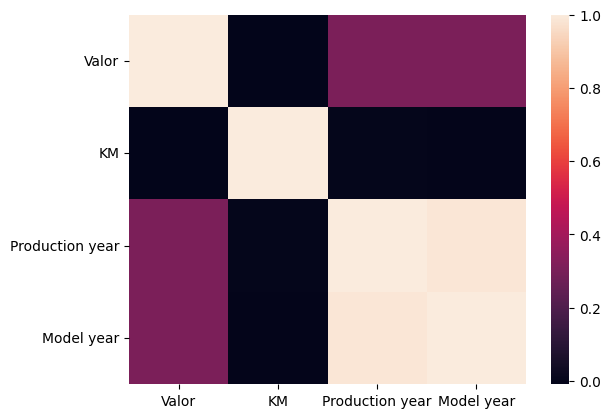

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr)

In [66]:
df2['KM']

0       270000
1        30016
2         3617
3        23608
4         7972
         ...  
3195     65456
3196         1
3197     45660
3198     20000
3199     63000
Name: KM, Length: 3200, dtype: int64

In [203]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

df2.drop(df2[df2['KM'] > 1000000].index, inplace=True)
X = df2.drop('Valor', axis=1)
y = df2['Valor']

num_variables = X.select_dtypes(['int64']).columns.tolist()
cat_variables = X.select_dtypes('object').columns.tolist()

X[cat_variables] = X[cat_variables].astype(str)

ct = ColumnTransformer([('num', StandardScaler(), num_variables),
                        ('cat', OneHotEncoder(), cat_variables)])

X_trans = ct.fit_transform(X)

In [205]:
ct.named_transformers_['num'].get_feature_names_out()

array(['KM', 'Production year', 'Model year'], dtype=object)

In [114]:
ct.output_indices_

{'num': slice(0, 3, None),
 'cat': slice(3, 6031, None),
 'remainder': slice(0, 0, None)}

<Axes: xlabel='KM', ylabel='Count'>

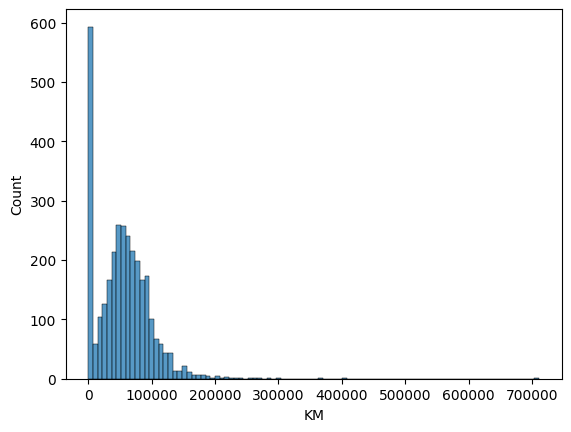

In [204]:
sns.histplot(X['KM'])

In [209]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8*(1-.8)))

X_sel = sel.fit_transform(X_trans[:,3:])
X_sel

<3195x99 sparse matrix of type '<class 'numpy.float64'>'
	with 153423 stored elements in Compressed Sparse Row format>

In [213]:
X_trans

<3195x6030 sparse matrix of type '<class 'numpy.float64'>'
	with 629415 stored elements in Compressed Sparse Row format>

In [215]:
X_sel2 = np.concatenate((X_trans.toarray()[:,0:3], X_sel.toarray()), axis=1)

In [217]:
X_sel2.shape

(3195, 102)

In [220]:
sel.get_feature_names_out()

array(['x1393', 'x1396', 'x1400', 'x1416', 'x1420', 'x1427', 'x1428',
       'x1433', 'x1434', 'x1435', 'x1436', 'x1439', 'x1440', 'x1443',
       'x1444', 'x1447', 'x1448', 'x1449', 'x1450', 'x1453', 'x1454',
       'x1455', 'x1456', 'x1457', 'x1458', 'x1459', 'x1460', 'x1461',
       'x1462', 'x1465', 'x1466', 'x1467', 'x1468', 'x1471', 'x1472',
       'x1473', 'x1474', 'x1475', 'x1476', 'x1481', 'x2628', 'x3722',
       'x3730', 'x3733', 'x3735', 'x3779', 'x3871', 'x3914', 'x3953',
       'x5751', 'x5752', 'x5755', 'x5756', 'x5757', 'x5758', 'x5763',
       'x5764', 'x5769', 'x5770', 'x5775', 'x5776', 'x5777', 'x5778',
       'x5779', 'x5780', 'x5781', 'x5782', 'x5791', 'x5792', 'x5797',
       'x5798', 'x5801', 'x5802', 'x5827', 'x5828', 'x5839', 'x5840',
       'x5841', 'x5842', 'x5845', 'x5846', 'x5847', 'x5848', 'x5849',
       'x5850', 'x5851', 'x5852', 'x5853', 'x5854', 'x5855', 'x5856',
       'x5857', 'x5858', 'x5859', 'x5860', 'x5869', 'x5870', 'x5873',
       'x5874'], dty

In [221]:
X_trans[:,3:]

<3195x6027 sparse matrix of type '<class 'numpy.float64'>'
	with 619830 stored elements in Compressed Sparse Row format>